In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv(r"D:\Rouute course\Projects\Gold Price\gld_price_data.csv")

In [6]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
df.drop('Date',axis=1,inplace=True)

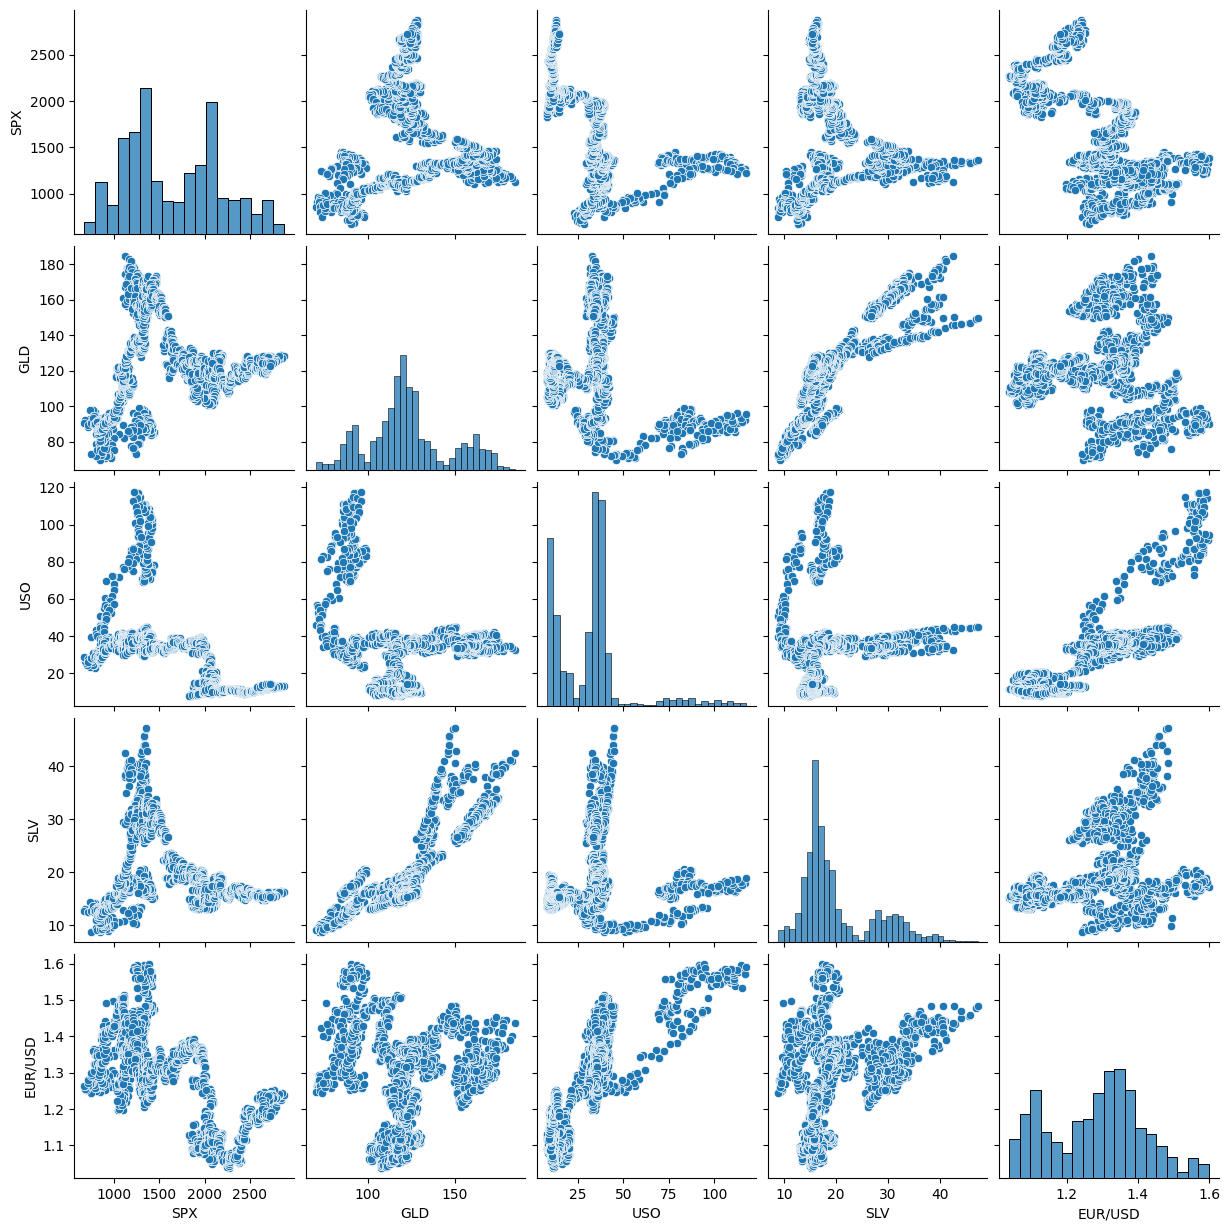

In [11]:
sns.pairplot(data=df)

In [12]:
df.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

<Axes: xlabel='SLV', ylabel='GLD'>

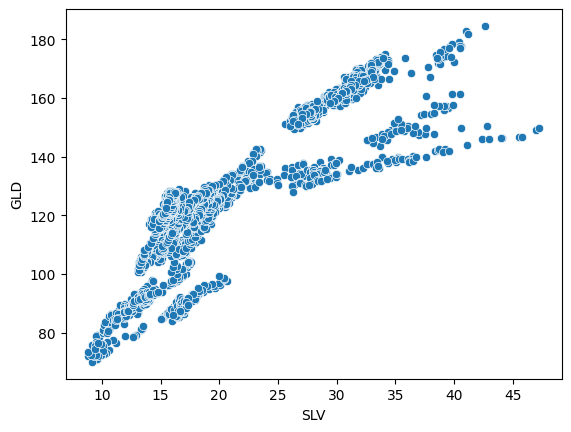

In [13]:
sns.scatterplot(data=df,x='SLV',y='GLD')

In [14]:
numerical_col=df.drop('GLD',axis=1)

In [15]:
numerical_col.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


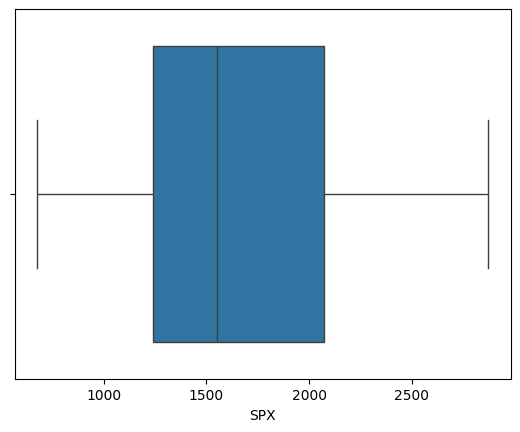

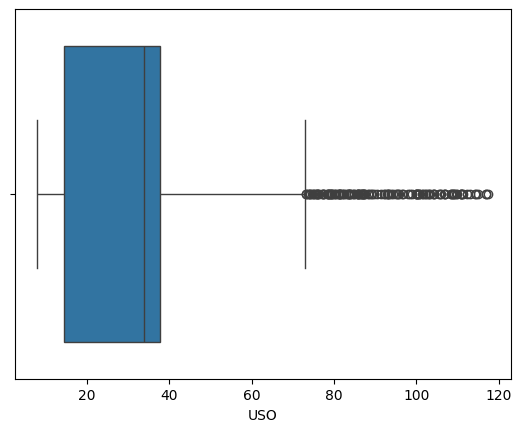

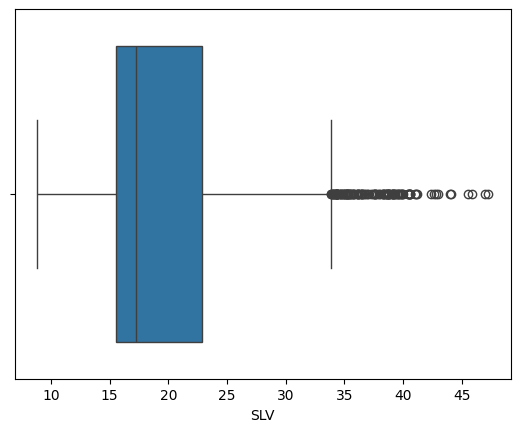

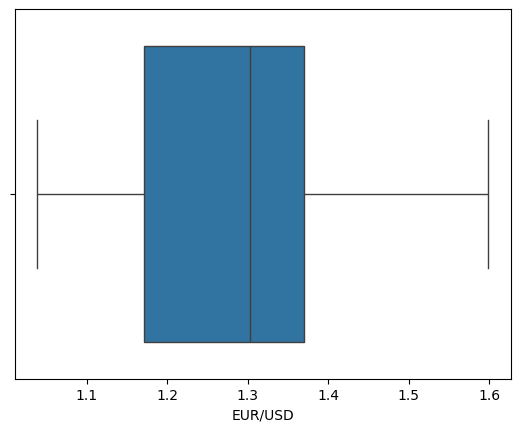

In [16]:
for col in numerical_col.columns:
    sns.boxplot(data=numerical_col,x=col)
    plt.show()

In [17]:
numerical_col

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


<Axes: >

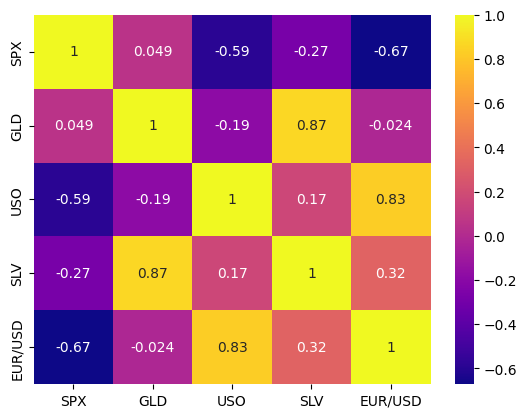

In [18]:
sns.heatmap(data=df.corr(),cmap='plasma',annot=True)

In [19]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


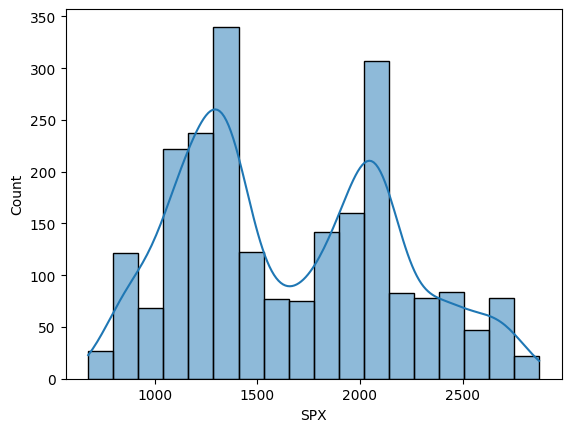

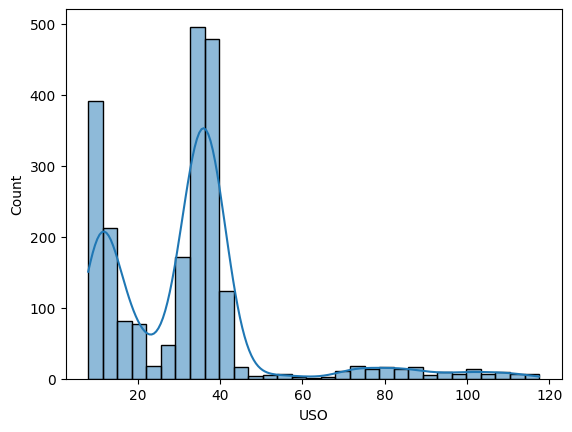

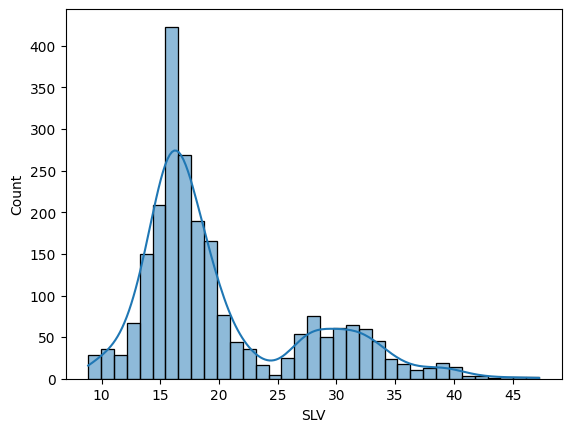

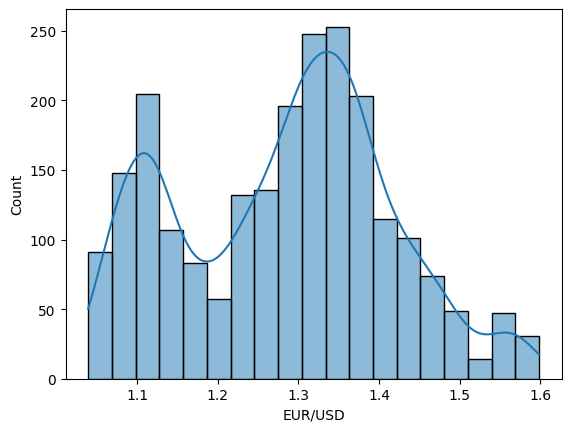

In [20]:
for col in numerical_col.columns:
    sns.histplot(data=numerical_col,x=col,kde=True)
    plt.show()

In [21]:
for col in numerical_col.columns:
    Q1=df[col].quantile(.25)
    Q3=df[col].quantile(.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    outliers=df[(df[col]<lower)|(df[col]>upper)]
    df.drop(outliers.index,inplace=True)

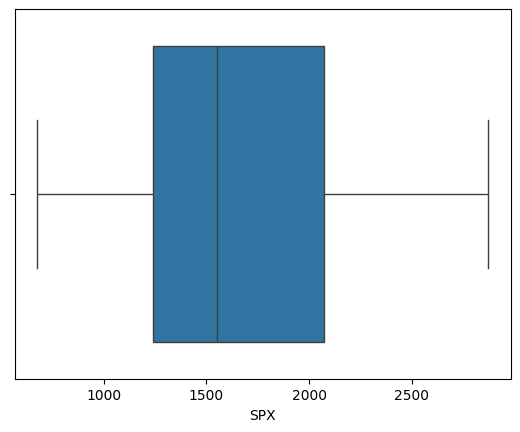

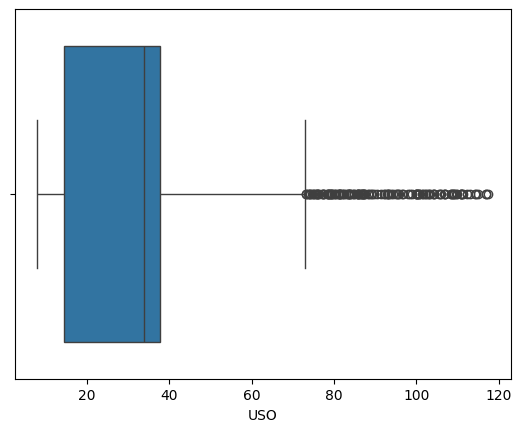

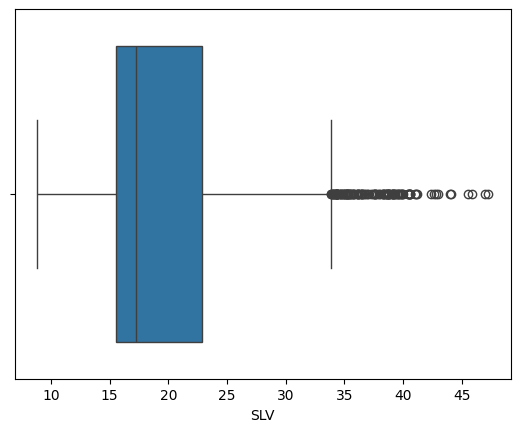

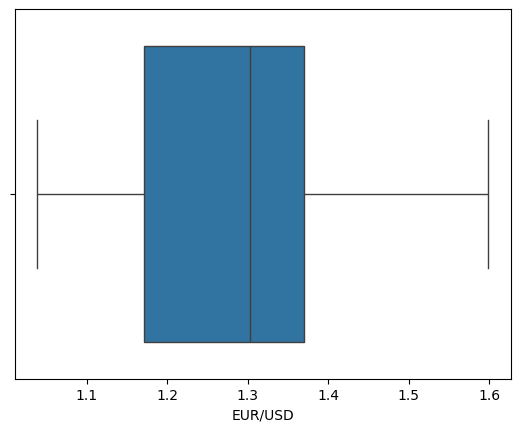

In [22]:
for col in numerical_col.columns:
    sns.boxplot(data=numerical_col,x=col)
    plt.show()

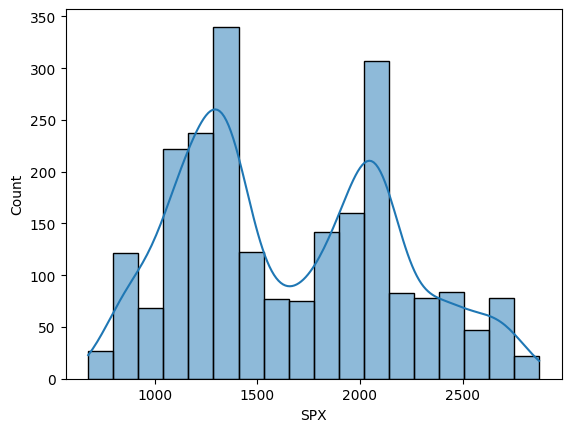

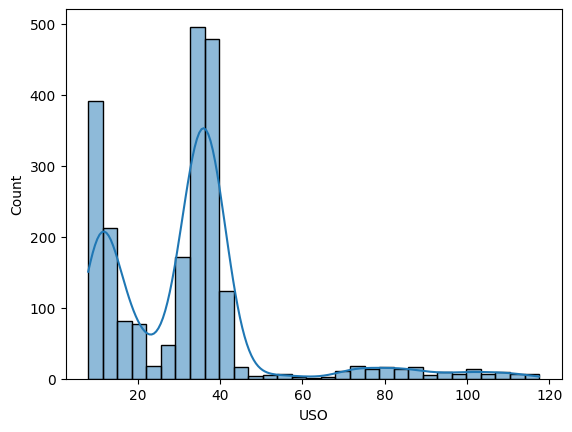

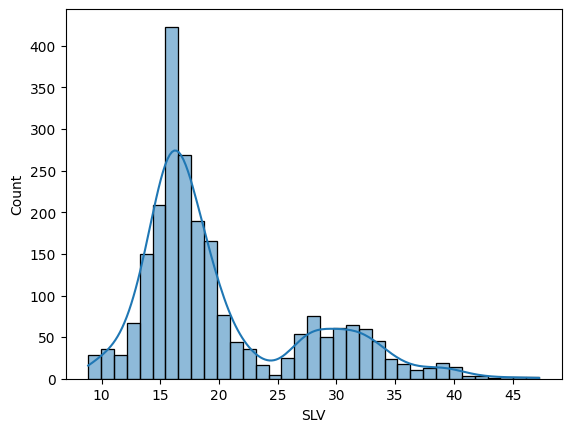

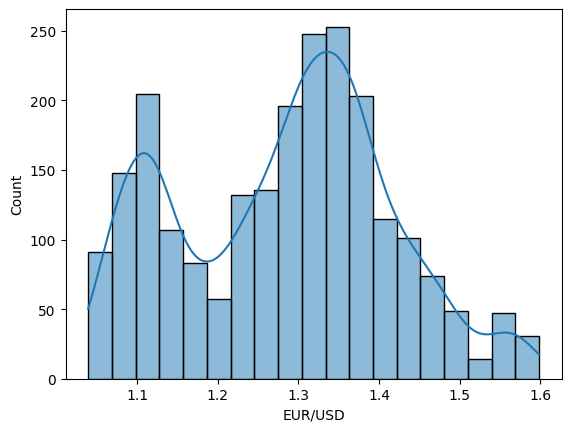

In [23]:
for col in numerical_col.columns:
    sns.histplot(data=numerical_col,x=col,kde=True)
    plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
df.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [26]:
x=df.drop('GLD',axis=1)
y=df['GLD']

In [27]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [28]:
x=pd.DataFrame(x,columns=scaler.get_feature_names_out())

In [29]:
x.head()

,SPX,USO,SLV,EUR/USD
0,0.320724,0.996924,0.215755,0.851581
1,0.317196,0.982621,0.210195,0.824933
2,0.299007,0.970009,0.212141,0.820290
3,0.295337,0.977853,0.221810,0.816036
4,0.288648,0.962627,0.217856,0.821823


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
model.score(x_train,y_train)

0.8913259974455533

In [35]:
y_pred=model.predict(x_test)

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [55]:
print(f'r2_score= {r2_score(y_test,y_pred):.4f}')
print(f'mean_absolute_error= {mean_absolute_error(y_test,y_pred):.4f}')
print(f'mean_squared_error= {mean_squared_error(y_test,y_pred):.4f}')

r2_score= 0.8660
mean_absolute_error= 5.2418
mean_squared_error= 56.8644


<Axes: xlabel='GLD'>

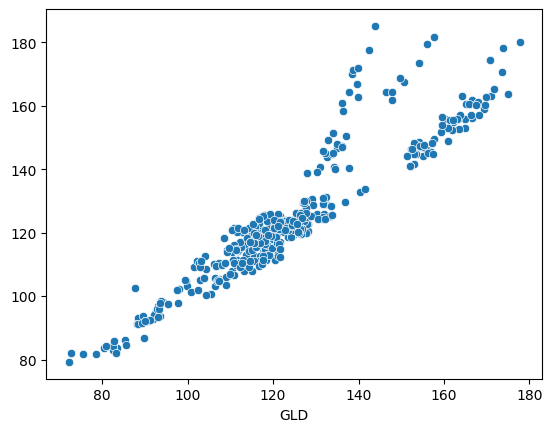

In [38]:
sns.scatterplot(x=y_test,y=y_pred)

## SVM

In [44]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [46]:
svr=SVR()
params={
    'kernel':['linear','poly','rbf'],
    'C':[.01,.1,.5,1,5,7,10],
    'gamma':[.01,.1,.5,1,5,7,10]

}
grid=GridSearchCV(svr,params,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 10, 'gamma': 10, 'kernel': 'rbf'}

In [ ]:
best_svr_model=SVR(C=10,gamma=10,kernel='rbf')
best_svr_model.fit(x_train,y_train)
y_svr_pred=best_svr_model.predict(x_test)

In [54]:
print(f'r2_score= {r2_score(y_test,y_svr_pred):.4f}')
print(f'mean_absolute_error= {mean_absolute_error(y_test,y_svr_pred):.4f}')
print(f'mean_squared_error= {mean_squared_error(y_test,y_svr_pred):.4f}')

r2_score= 0.9629
mean_absolute_error= 2.2268
mean_squared_error= 15.7648


## KNN

In [49]:
from sklearn.neighbors import KNeighborsRegressor

In [50]:
knn=KNeighborsRegressor()
params2={
    'n_neighbors':range(1,30),
    'weights':['uniform','distance'],
    'p':[1,2]
}
grid2=GridSearchCV(knn,params2,cv=5)
grid2.fit(x_train,y_train)
grid2.best_params_

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

In [51]:
best_knn_model=KNeighborsRegressor(n_neighbors=4,p=1,weights='distance')
best_knn_model.fit(x_train,y_train)
y_knn_pred=best_knn_model.predict(x_test)

In [53]:
print(f'r2_score= {r2_score(y_test,y_knn_pred):.4f}')
print(f'mean_absolute_error= {mean_absolute_error(y_test,y_knn_pred):.4f}')
print(f'mean_squared_error= {mean_squared_error(y_test,y_knn_pred):.4f}')

r2_score= 0.9923945502579248
mean_absolute_error= 1.1237
mean_squared_error= 3.2286470812753243
